<a href="https://colab.research.google.com/github/HAMOUMASihem/Sentiment-analyses-/blob/main/Reviews_of_Amazon_Products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis of Consumer Reviews of Amazon Products

In [ ]:
import tensorflow as tf
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT available")


GPU is available


In [ ]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from transformers import pipeline
from transformers import TrainingArguments, Trainer

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd
pd.options.display.max_colwidth = 300
from sklearn.utils import class_weight
import numpy as np
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from transformers import AutoModelForSequenceClassification
from datasets import Dataset
from datasets import load_dataset
from Emoticon import EMOTICONS_EMO
from sklearn.utils import shuffle
import torch
from torch import nn
from transformers import DataCollatorWithPadding


# Data Description
For this project I used the data provided by Kaggle [link text](https://https://colab.research.google.com/drive/1CFvHVrLS2UC6-WiwWUtdACcezpc84cDQ#scrollTo=1Fo2dxsGhclj&line=2&uniqifier=1)Consumer Reviews of Amazon Products. The dataset includes rating, review text, category, timestamp etc. for each product.






# Helper Functions

In [ ]:
def create_sentiment(row):
    """ Convert rating to setiment
    Input:
        pandas Series row
    Output
        pandas Series row


    """
def create_sentiment(row):
    """ Convert rating to setiment
    Input:
        pandas Series row
    Output
        pandas Series row


    """
    if row >= 4:
        sentiment = 1
    else:
        sentiment = 0
    return sentiment



In [ ]:
def convert_predictions(row):
    """ Convert predicted sentiment to nummeric output
    Input:
        pandas Series row
    Output
        pandas Series row


    """
    if row[0]["label"]=='POSITIVE':
        sentiment = 1

    elif row[0]["label"]=='NEGATIVE':
        sentiment = 0
    else:
        sentiment = np.nan
    return sentiment

In [ ]:
import pandas as pd

# Ensure the file path is correct
file_path = "/content/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv"

df = pd.read_csv(file_path, engine="python", encoding="utf-8", on_bad_lines="skip")


In [ ]:
df.head(3)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation, 2016)",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electronics,iPad & Tablets,Kindle E-readers,iPad Accessories,Used:Tablets,E-Readers,E-Readers & Accessories,Computers/Tablets & Networking,Used:Computers Accessories,iPads Tablets,All Tablets,Tablets & E-readers,Computers & Tablets,Amazon,Tablets & eBook Re...",Electronics,"https://pisces.bbystatic.com/image2/BestBuy_US/images/products/5442/5442403_sd.jpg,https://c1.neweggimages.com/NeweggImage/ProductImage/A3FA_1_201801081360871160.jpg,https://i.ebayimg.com/thumbs/images/g/N4IAAOSwoA9Zgkso/s-l96.jpg,http://i.ebayimg.com/thumbs/images/g/dpkAAOSwfpVZFKHy/s-l200.jpg,...","allnewkindleereaderblack6glarefreetouchscreendisplaywifiincludesspecialoffers/b00zv9pxp2,allnewkindleereaderblack6glarefreetouchscreendisplaywifiincludesspecialoffers/9siafvd7fk6707,0848719083774,848719083774,allnewkindleereaderblack6glarefreetouchscreendisplaywifiincludesspecialoffers/322538285...",...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017-09-06T00:00:00Z,2017-09-12T00:00:00Z",False,NaN,0,3,"http://reviews.bestbuy.com/3545/5442403/reviews.htm%25252525253Fformat%25252525253Dembedded,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D20,https://reviews.bestbuy.com/3545/5442403/reviews.htm%25252525253Fformat...",I thought it would be as big as small paper but turn out to be just like my palm. I think it is too small to read on it... not very comfortable as regular Kindle. Would definitely recommend a paperwhite instead.,Too small,llyyue,"https://www.newegg.com/Product/Product.aspx%25253FItem%25253D9SIAFVD7FK6707,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D39,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253..."
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation, 2016)",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electronics,iPad & Tablets,Kindle E-readers,iPad Accessories,Used:Tablets,E-Readers,E-Readers & Accessories,Computers/Tablets & Networking,Used:Computers Accessories,iPads Tablets,All Tablets,Tablets & E-readers,Computers & Tablets,Amazon,Tablets & eBook Re...",Electronics,"https://pisces.bbystatic.com/image2/BestBuy_US/images/products/5442/5442403_sd.jpg,https://c1.neweggimages.com/NeweggImage/ProductImage/A3FA_1_201801081360871160.jpg,https://i.ebayimg.com/thumbs/images/g/N4IAAOSwoA9Zgkso/s-l96.jpg,http://i.ebayimg.com/thumbs/images/g/dpkAAOSwfpVZFKHy/s-l200.jpg,...","allnewkindleereaderblack6glarefreetouchscreendisplaywifiincludesspecialoffers/b00zv9pxp2,allnewkindleereaderblack6glarefreetouchscreendisplaywifiincludesspecialoffers/9siafvd7fk6707,0848719083774,848719083774,allnewkindleereaderblack6glarefreetouchscreendisplaywifiincludesspecialoffers/322538285...",...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017-08-09T00:00:00Z,2017-08-02T00:00:00Z,2017-08-31T00:00:00Z",True,NaN,0,5,"http://reviews.bestbuy.com/3545/5442403/reviews.htm%25252525253Fformat%25252525253Dembedded%252525252526page%25252525253D2,http://reviews.bestbuy.com/3545/5442403/reviews.htm%25252525253Fformat%25252525253Dembedded%252525252526page%25252525253D4,https://reviews.bestbuy.com/3545/5442403/reviews.h...",This kindle is light and easy to use especially at the beach!!!,Great light reader. Easy to use at the beach,Charmi,"https://www.newegg.com/Product/Product.aspx%25253FItem%25253D9SIAFVD7FK6707,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252

In [ ]:
df['categories'].unique()

array(['Computers,Electronics Features,Tablets,Electronics,iPad & Tablets,Kindle E-readers,iPad Accessories,Used:Tablets,E-Readers,E-Readers & Accessories,Computers/Tablets & Networking,Used:Computers Accessories,iPads Tablets,All Tablets,Tablets & E-readers,Computers & Tablets,Amazon,Tablets & eBook Readers',
       'Computers,Amazon Echo,Virtual Assistant Speakers,Audio & Video Components,Electronics Features,Computer Accessories,Home & Tools,See more Amazon Echo Show Smart Assistant - White,Smart Home Automation,Electronics,TVs Entertainment,Speakers,Smart Hub & Kits,Digital Device 3,Consumer Electronics,Wireless Speakers,Home Improvement,Amazon Home,Amazon,Computer Speakers,Voice-Enabled Smart Assistants'],
      dtype=object)

In [ ]:
# remove empty reviews and rating
df = df[(df['reviews.text'].isnull()==False)&(df['reviews.rating'].isnull()==False)]

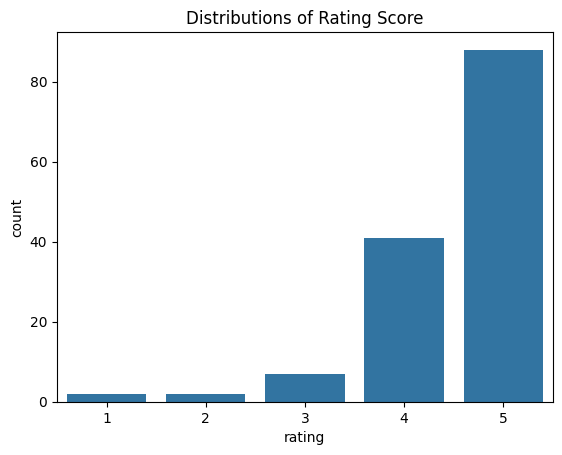

In [ ]:
sns.countplot(data=df, x="reviews.rating")
plt.xlabel('rating');
plt.title("Distributions of Rating Score");

Turning to the graphic, it shows the scores from minimal 1 and maximum 5. Interesting is that the data has a lot of better score (4-5) and  , 3 natural , less negative (1-2)

In [ ]:
# convert rating to sentiment classes (positive and negative)
df.loc[:,'label'] = df['reviews.rating'].apply(create_sentiment)
df.head(3)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,label
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation, 2016)",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electronics,iPad & Tablets,Kindle E-readers,iPad Accessories,Used:Tablets,E-Readers,E-Readers & Accessories,Computers/Tablets & Networking,Used:Computers Accessories,iPads Tablets,All Tablets,Tablets & E-readers,Computers & Tablets,Amazon,Tablets & eBook Re...",Electronics,"https://pisces.bbystatic.com/image2/BestBuy_US/images/products/5442/5442403_sd.jpg,https://c1.neweggimages.com/NeweggImage/ProductImage/A3FA_1_201801081360871160.jpg,https://i.ebayimg.com/thumbs/images/g/N4IAAOSwoA9Zgkso/s-l96.jpg,http://i.ebayimg.com/thumbs/images/g/dpkAAOSwfpVZFKHy/s-l200.jpg,...","allnewkindleereaderblack6glarefreetouchscreendisplaywifiincludesspecialoffers/b00zv9pxp2,allnewkindleereaderblack6glarefreetouchscreendisplaywifiincludesspecialoffers/9siafvd7fk6707,0848719083774,848719083774,allnewkindleereaderblack6glarefreetouchscreendisplaywifiincludesspecialoffers/322538285...",...,False,NaN,0,3,"http://reviews.bestbuy.com/3545/5442403/reviews.htm%25252525253Fformat%25252525253Dembedded,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D20,https://reviews.bestbuy.com/3545/5442403/reviews.htm%25252525253Fformat...",I thought it would be as big as small paper but turn out to be just like my palm. I think it is too small to read on it... not very comfortable as regular Kindle. Would definitely recommend a paperwhite instead.,Too small,llyyue,"https://www.newegg.com/Product/Product.aspx%25253FItem%25253D9SIAFVD7FK6707,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D39,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253...",0
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation, 2016)",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electronics,iPad & Tablets,Kindle E-readers,iPad Accessories,Used:Tablets,E-Readers,E-Readers & Accessories,Computers/Tablets & Networking,Used:Computers Accessories,iPads Tablets,All Tablets,Tablets & E-readers,Computers & Tablets,Amazon,Tablets & eBook Re...",Electronics,"https://pisces.bbystatic.com/image2/BestBuy_US/images/products/5442/5442403_sd.jpg,https://c1.neweggimages.com/NeweggImage/ProductImage/A3FA_1_201801081360871160.jpg,https://i.ebayimg.com/thumbs/images/g/N4IAAOSwoA9Zgkso/s-l96.jpg,http://i.ebayimg.com/thumbs/images/g/dpkAAOSwfpVZFKHy/s-l200.jpg,...","allnewkindleereaderblack6glarefreetouchscreendisplaywifiincludesspecialoffers/b00zv9pxp2,allnewkindleereaderblack6glarefreetouchscreendisplaywifiincludesspecialoffers/9siafvd7fk6707,0848719083774,848719083774,allnewkindleereaderblack6glarefreetouchscreendisplaywifiincludesspecialoffers/322538285...",...,True,NaN,0,5,"http://reviews.bestbuy.com/3545/5442403/reviews.htm%25252525253Fformat%25252525253Dembedded%252525252526page%25252525253D2,http://reviews.bestbuy.com/3545/5442403/reviews.htm%25252525253Fformat%25252525253Dembedded%252525252526page%25252525253D4,https://reviews.bestbuy.com/3545/5442403/reviews.h...",This kindle is light and easy to use especially at the beach!!!,Great light reader. Easy to use at the beach,Charmi,"https://www.newegg.com/Product/Product.aspx%25253FItem%25253D9SIAFVD7FK6707,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253Dembedded%25252525252526page%2525252525253D39,https://reviews.bestbuy.com/3545/5442403/reviews.htm%2525252525253Fformat%2525252525253...",1
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T1

In [ ]:
df = df[['reviews.text','label']]
df

,reviews.text,label
0,I thought it would be as big as small paper but turn out to be just like my palm. I think it is too small to read on it... not very comfortable as regular Kindle. Would definitely recommend a paperwhite instead.,0
1,This kindle is light and easy to use especially at the beach!!!,1
2,"Didnt know how much i'd use a kindle so went for the lower end. im happy with it, even if its a little dark",1
3,"I am 100 happy with my purchase. I caught it on sale at a really good price. I am normally a real book person, but I have a 1 year old who loves ripping up pages. The Kindle prevents that, it's extremely portable (it fits better in my purse than a giant book), and I have it loaded with lots of b...",1
4,Solid entry level Kindle. Great for kids. Gifted for a kid of my friend and they love to use it to read more than their iPads. battery is good but higher model is a bit better.,1
...,...,...
135,"I love the Echo Show and this is the 3rd one I have purchased (two were presents for family at Christmas). This one was for me. I love being able to hear music, connect with family via video and ask Alexa questions. Best purchase I could have made!",1
136,"Awesome sound which was unexpected. It's nice seeing info on the screen such as recipes, song lyrics, weather, etc.",1
137,I love the capability to see it on the screen and it allows me to not have to use my hands.,1
138,Screen is really nice great for videos I would definetly recommend it,1


In [ ]:
df.rename(columns={'reviews.text': "text"},inplace=True)

In [ ]:
# remove duplicates
df.drop_duplicates(subset=['text'], keep='last', inplace=True)

In [ ]:
df.shape

(140, 2)

The text in comments is quite clean without html tags and with very few links. So for that reason, I will only convert emojis to text. In addition, for data Data augmentation (Section 3) I will use the technique of back translation. Therefore, I will not lowercase the text.

In [ ]:
def convert_emoticons_to_words(row):
    """ Convert emojis in comments into text
    Input:
        pandas Series row
    Output
        pandas Series row


    """
    for i, j in EMOTICONS_EMO.items():
        row = row.replace(i, j)
    return row

In [ ]:
df['text'] = df['text'].apply(convert_emoticons_to_words)

In [ ]:
def visualize_class_distribution(data):
    """
    Visualisation of the proportions
    for each class
    Input:
        data: pandas dataframe
    Output:
        None

    """
    colors = ['royalblue', 'red' ]
    fig, ax = plt.subplots()
    ax.pie(data['label'].value_counts(), labels=["positive","negative"], autopct='%1.1f%%', colors=colors)
    plt.title("Sentiment Class Distribution");

The graph below makes it clear that the class of negative reviews is disproportionally underrepresented. This challenge will be handled in the section "3. Data augmentation" and "5. Data balancing"

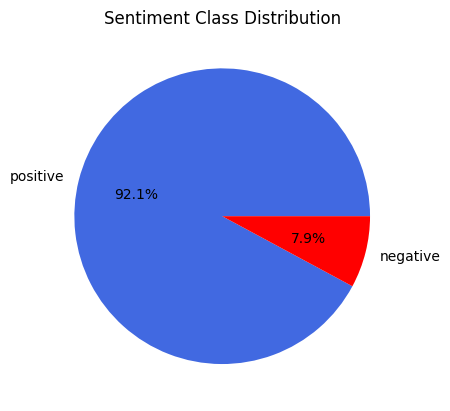

In [ ]:
visualize_class_distribution(df)

#2. Data splitting

In [ ]:
# splitting dataset into training(60%), validation(20%) and test set (20%)
train, validate, test = \
              np.split(df.sample(frac=1, random_state=42),
                       [int(.6*len(df)), int(.8*len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Using Basic "sentiment-roberta-large-english" Model
As the baseline I use SiEBERT - English-Language Sentiment Classification model which enables to predict positive and negative sentiment. The model is a fine-tuned checkpoint of RoBERTa-large (Liu et al. 2019) and outperformed DistilBERT SST-2 on average by 15 p.p. (78.1 vs 93.2)

In [ ]:
## roberta_classifier
roberta_classifier = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english",device=0,truncation = True)

In [ ]:
def get_predictions(data_test, classifier):
    """
    Create new column with predictions
    Input:
        data_test: DataFrame
    Output:
        data_test: DataFrame (with predictions)
    """
    data_test['roberta_sentiment'] = data_test['text'].apply(lambda x : classifier(x))
    data_test.loc[:,'predicted'] =data_test["roberta_sentiment"].apply(convert_predictions)
    return data_test


In [ ]:
test_basis = test.copy()

In [ ]:
test_basis_prediction = get_predictions(test_basis, roberta_classifier)
print(classification_report(test_basis_prediction.label, test_basis_prediction.predicted))
# check if there are any unpredicted comments
test_basis_prediction[test_basis_prediction.predicted.isnull()==True]

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.93      0.96        27

    accuracy                           0.93        28
   macro avg       0.67      0.96      0.73        28
weighted avg       0.98      0.93      0.95        28



,text,label,roberta_sentiment,predicted


# Fine-tuning model
##3. Data augmentation
For data augmentation I will use the technique “Back Translation”. First of all, I translate the English text into German and then back to English. The major reasons for this technique are

There are enough good performing models for English
Due to the fact, that the task is sentiment analysis (the polarity of the sentences). I don’t want to add noise to the dataset with random replacement, random insertion or text generation etc.
With Back Translation we will create new samples for the minority class (oversampling)

In [ ]:
#English to German
translation_en_to_de = pipeline("translation_en_to_de", model='t5-base',device=0)

#German to English
tokenizer = AutoTokenizer.from_pretrained("google/bert2bert_L-24_wmt_de_en", pad_token="<pad>", eos_token="</s>", bos_token="<s>",device=0)
model_de_to_en = AutoModelForSeq2SeqLM.from_pretrained("google/bert2bert_L-24_wmt_de_en")

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/3.44k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/269k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.09G [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.bert_generation.modeling_bert_generation.BertGenerationEncoder'> is overwritten by shared encoder config: BertGenerationConfig {
  "architectures": [
    "BertGenerationDecoder"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": null,
  "directionality": "bidi",
  "eos_token_id": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 1024,
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert-generation",
  "num_attention_heads": 16,
  "num_hidden_layers": 24,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "return_dict": false,
  "transformers_version": "4.46.3",
  "use_cache": true,
  "vocab_size": 31950
}

Config of the decoder: <class 'transformers.models.bert_generation.modeling_bert_generation.BertGenerationDecoder'> is overwritten by shared decoder config: Bert

generation_config.json:   0%|          | 0.00/207 [00:00<?, ?B/s]

In [ ]:
def back_translation(input_text):
    """ Translate the text from English to German
        and then from German to English
    Input:
        pandas Series row
    Output
        pandas Series row


    """
    review_en_to_de = translation_en_to_de(input_text)
    text_en_to_de = review_en_to_de[0]['translation_text']
    input_ids = tokenizer(text_en_to_de, return_tensors="pt", add_special_tokens=False,max_length=512,truncation=True).input_ids
    output_ids = model_de_to_en.generate(input_ids)[0]
    augmented_review = tokenizer.decode(output_ids, skip_special_tokens=True)
    return augmented_review


In [ ]:
def create_data_samples(data):
    """
    Balance the entire dataset by oversampling minority classes
    Input:
        data: pandas data frame
    Output:
        balanced data frame
    """
    # Count the number of samples in each class
    count_labels = data["label"].value_counts()

    # Find the total number of samples you want (typically, use the majority class count)
    total_samples_per_class = count_labels.max()

    # Create a list to store samples for each class
    balanced_samples = []

    # Process each unique label
    for label in count_labels.index:
        # Select data for the current label
        data_subset = data[data.label == label]

        # Calculate how many samples to generate or select
        current_count = len(data_subset)

        if current_count < total_samples_per_class:
            # If we need more samples, do two things:
            # 1. Select all existing samples
            balanced_samples.append(data_subset)

            # 2. Generate additional synthetic samples
            n_synthetic = total_samples_per_class - current_count

            # Generate synthetic samples using back translation
            synthetic_samples = data_subset.sample(n=n_synthetic, replace=True, random_state=1)
            synthetic_samples.loc[:, 'samples'] = synthetic_samples["text"].apply(back_translation)
            synthetic_samples = synthetic_samples.drop('text', axis=1)
            synthetic_samples.rename(columns={'samples': "text"}, inplace=True)

            balanced_samples.append(synthetic_samples)
        else:
            # If we have more samples than needed, randomly sample to the target count
            balanced_samples.append(data_subset.sample(n=total_samples_per_class, random_state=1))

    # Combine all balanced samples
    data_balanced = pd.concat(balanced_samples, ignore_index=True)

    # Shuffle the dataset
    data_balanced = shuffle(data_balanced, random_state=0)

    return data_balanced

In [ ]:

train = create_data_samples(train)

Looking at the graph below you can see, that now the training dataset is balanced. This dataset will be used for the second approach (Data Balancing - Oversampling)

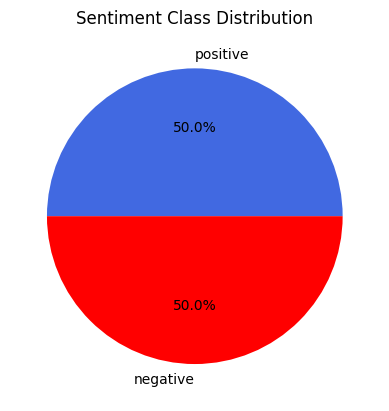

In [ ]:
visualize_class_distribution(train)

In [ ]:
train.shape

(152, 2)

# 4. Data preprocessing
One of the parameter of tokenizer is max_length. So, before I use default number, let us check, what is the max number of the reviews

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("siebert/sentiment-roberta-large-english")

In [ ]:
train = Dataset.from_pandas(train).remove_columns(['__index_level_0__'])
validate = Dataset.from_pandas(validate).remove_columns(['__index_level_0__'])
test = Dataset.from_pandas(test).remove_columns(['__index_level_0__'])

In [ ]:
def get_review_len(data):
    """
    Calculate the length of each sentence
    Input:
        data: Dataset
    Output:
        tokens_len: list with length of each sentence

    """
    tokens_len = []
    for review in data["text"]:
        tokens = tokenizer.encode(review)
        tokens_len.append(len(tokens))
    return tokens_len

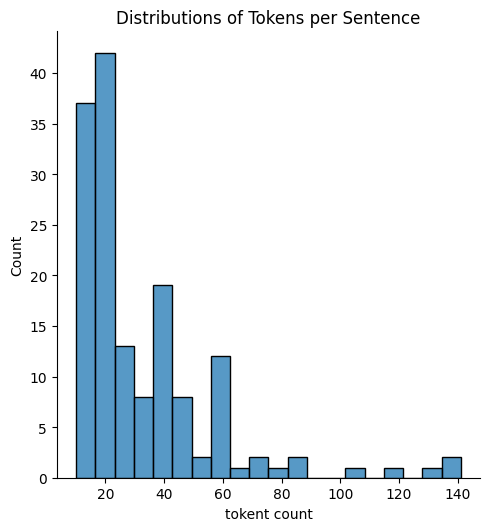

In [ ]:
# max number of tokens
np.array(get_review_len(train)).max()
# min number of tokens
np.array(get_review_len(train)).min()
sns.displot(get_review_len(train),bins=20)
plt.xlabel('tokent count');
plt.title("Distributions of Tokens per Sentence");

The graph above makes it clear that the most of the review are below 180 tokens. For that reason, I will set max_lenght to 180

In [ ]:
def preprocess_function(data):
    """
    Input data: Dataset
    Output: data: Dataset: with 'input_ids' and 'attention_mask'

    """
    return tokenizer(data['text'], padding="max_length", max_length=180,truncation=True)

In [ ]:
tokenized_train = train.map(preprocess_function, batched=True)
tokenized_val= validate.map(preprocess_function, batched=True)

Map:   0%|          | 0/152 [00:00<?, ? examples/s]

Map:   0%|          | 0/28 [00:00<?, ? examples/s]

In [ ]:
#In order to speed up the training, the training samples will be converted to Pytorch tensors
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("siebert/sentiment-roberta-large-english", num_labels=2)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 1024, padding_idx=1)
      (position_embeddings): Embedding(514, 1024, padding_idx=1)
      (token_type_embeddings): Embedding(1, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-23): 24 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=Tru

For the evaluation of the model performance, I will use on the one hand, accuracy, on the other hand f1 score (as we have an imbalanced dataset). In comparison to accuracy, the f1-score pays more attention to false negative and false positive predictions

In [ ]:
def compute_metrics(eval_pred):
    """
    Defines the evaluation metrics for fine-tuned model

    """
    load_accuracy = load_metric("accuracy")
    load_f1 = load_metric("f1")

    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = load_accuracy.compute(predictions=predictions, references=labels)["accuracy"]
    f1 = load_f1.compute(predictions=predictions, references=labels)["f1"]

    print("eval_pred", type(eval_pred))
    print("accuracy", type(accuracy),accuracy)
    print("f1", type(f1),f1)
    return {"accuracy": accuracy, "f1": f1}

5. Data balancing
Since the dataset is imbalanced, I will test two approaches

I will integrate the weighted loss into the Trainer. Usually, the data points from each class are treated the same. That means, that the model will learn more for the class which is overrepresented in the dataset. In order to overcome this issue, the weights for minority classes will be increased. This behavior will increase the loss as well and so force the model to pay more attention to these samples.
Random oversampling the minority of class through Back Translation (see function create_data_samples). In this case, the "CLASS_WEIGHTS" will be balanced and so have no substational impact on CrossEntropyLoss

In [ ]:
import torch

# Check if MPS is available
device = torch.device("mps") if torch.has_mps else torch.device("cpu")

print("Using device:", device)

# Example tensor on MPS
x = torch.tensor([1.0, 2.0, 3.0], device=device)
print(x)


Using device: cpu
tensor([1., 2., 3.])


<ipython-input-62-87494229fa5b>:4: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  device = torch.device("mps") if torch.has_mps else torch.device("cpu")


In [ ]:
CLASS_WEIGHTS=class_weight.compute_class_weight('balanced',classes=np.unique(train["label"]),y=train["label"])
CLASS_WEIGHTS=torch.tensor(CLASS_WEIGHTS,dtype=torch.float,device= 0)

In [ ]:
CLASS_WEIGHTS

tensor([1., 1.], device='cuda:0')

In [ ]:
class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        # forward pass
        outputs = model(**inputs)
        logits = outputs.get('logits')
        # compute custom loss
        loss_fct = nn.CrossEntropyLoss(weight=CLASS_WEIGHTS,reduction='mean')
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

In [ ]:
training_args = TrainingArguments(
   output_dir="finetuning-sentiment-roberta-large-english",
   learning_rate=2e-5,
   per_device_train_batch_size=16,
   per_device_eval_batch_size=16,
   num_train_epochs=2,
   optim = "adamw_torch",
   save_strategy="epoch",
   use_mps_device= 0,
   warmup_steps = 500,
   weight_decay = 0.01
)

In [ ]:
trainer = CustomTrainer(
   model=model,
   args=training_args,
   train_dataset=tokenized_train,
   eval_dataset=tokenized_val,
   tokenizer=tokenizer,
   data_collator=data_collator,
   compute_metrics=compute_metrics
)


<ipython-input-69-078c40bf8fa8>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CustomTrainer.__init__`. Use `processing_class` instead.
  trainer = CustomTrainer(


In [ ]:
trainer.train()


NameError: name 'trainer' is not defined

In [ ]:
trainer.evaluate()


NameError: name 'trainer' is not defined

In [ ]:
trainer.save_model("sentiment-roberta-large-english-fine-tuned")

In [ ]:
sentiment_model_fine_tuned =  pipeline("sentiment-analysis",model="sentiment-roberta-large-english-fine-tuned",truncation = True)
test_fine_tuned_prediction = get_predictions(test_basis, sentiment_model_fine_tuned)
print(classification_report(test_fine_tuned_prediction.label, test_fine_tuned_prediction.predicted))
# check if there are any unpredicted comments
test_fine_tuned_prediction[test_fine_tuned_prediction.predicted.isnull()==True]

Summary
As shown above the dataset was imbalanced. For this reason, I tested two approaches:

Estimated the weights for imbalanced dataset and forwarded them to the CrossEntropyLoss(). The argument “weight” has impact on the importance of each class
             precision    recall  f1-score   support

       0       0.69      0.53      0.60        45
       1       0.98      0.99      0.98       832

accuracy                            0.96       877
macro avg       0.83      0.76      0.79       877
weighted avg    0.96      0.96      0.96       877
Random oversampling the minority of class through Back Translation
               precision    recall  f1-score   support

       0       0.54      0.49      0.51        45
       1       0.97      0.98      0.97       832

accuracy                            0.95       877
macro avg       0.75      0.73      0.74       877
weighted avg    0.95      0.95      0.95       877
Overall our sentiment analysis shows, that estimation of the weights for imbalanced dataset has more impact on the f-score for negative class and improved the model performance compared to the baseline by 0.03 for negative class and by 0.01 for positive.

Furthermore, the technique used was to help us to compare the three models namely: oversampling, weights estimation and baseline. In result, we can observe the decrease of the f1-score for negative examples (oversampling) by 0.09 compared to weights estimation and by 0.06 compared to baseline model. Noticeably, the model has challenges to generalize on the test set and considerable increased the training time.